In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier

In [2]:
catalog = pd.read_csv('pulsar_stars.csv')
cnames = ['Imean','Isigma','Ikurtosis','Iskewness','DMmean','DMsigma','DMkurtosis','DMskewnes','target']
catalog.columns=cnames
catalog

,Imean,Isigma,Ikurtosis,Iskewness,DMmean,DMsigma,DMkurtosis,DMskewnes,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [4]:
#Hay NaN?
catalog.isnull().any().any()

False

In [5]:
#Aqui convertimos el data frame (sin la columna target) a ndarray
catalog_data=catalog.drop('target',axis=1).values
#type(catalog_data)
catalog_target=catalog.target.values
#type(catalog_target)

In [6]:
dataset = sklearn.datasets.base.Bunch(data=catalog_data,target=catalog_target)
#type(dataset)
#type(dataset.data)
#type(dataset.target)

In [7]:
#por default test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25,random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (13423, 8)
y_train shape: (13423,)
X_test shape: (4475, 8)
y_test shape: (4475,)


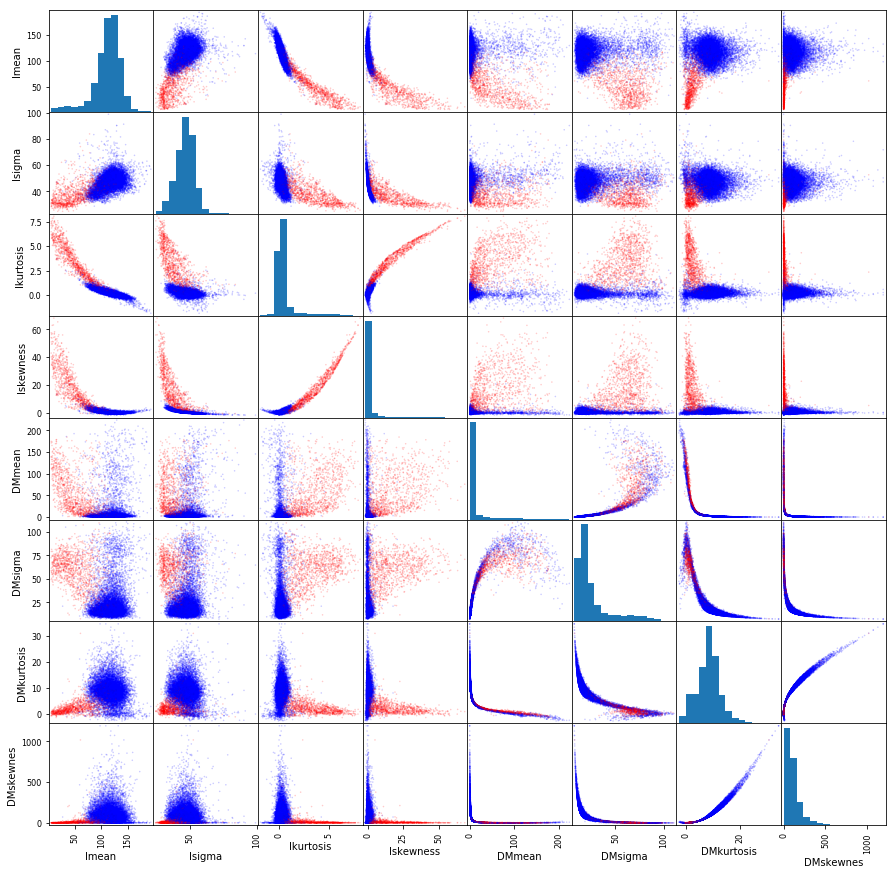

In [18]:
train_dataframe = pd.DataFrame(X_train, columns=catalog.columns.drop('target'))
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(train_dataframe, c=y_train, figsize=(15, 15), marker='.',hist_kwds={'bins': 15}, s=10, alpha=.2,cmap=plt.get_cmap('bwr'))
plt.savefig('test.eps')

In [57]:
#n_neighbors: number of neighbors
#weights: if 'uniform' all points are weighted equally
#algorithm: algorithm used to compute the nearest neighbors
#p: power parameter in the minkowski metric
#metric: metric='euclidean' is the same as metric='minkowski' with p=2 (see sklearn.neighbors.DistanceMetric doc)
pc = KNeighborsClassifier(n_neighbors=3)
pc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [36]:
pc.score(X_test,y_test)

0.97407821229050284

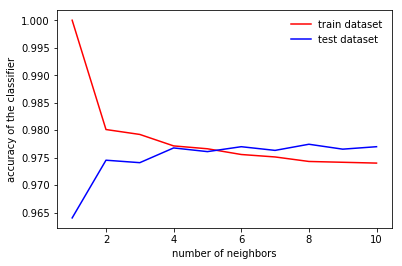

In [53]:
kneigh=list(range(1,11))
score_train = []
score_test  = []
for i in kneigh:
    pc = KNeighborsClassifier(n_neighbors=i)
    pc.fit(X_train, y_train)
    score_train.append(pc.score(X_train,y_train))
    score_test.append(pc.score(X_test,y_test))
    
plt.plot(kneigh,score_train,'r',label='train dataset')
plt.plot(kneigh,score_test,'b',label='test dataset')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy of the classifier')
plt.legend(frameon=False)